# Chap 12. Motion Tracking

## Motion 

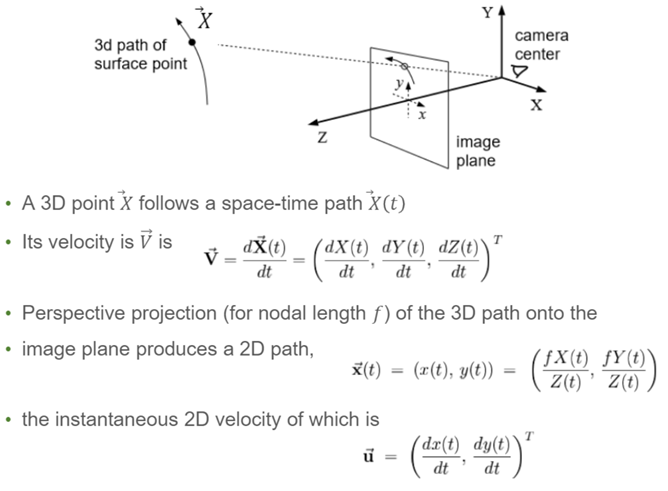

### Types of motion
- Moving with a fixed camera
- Moving with a moving camera
- Fixed object with a moving camera : tracking shot 

### 2 Key Problems
- Determine what image property to track
- Determine how to track it

### Motion estimation techniques
- Optical flow
  : Reocver image motion at each pixel from spatio-temporal image brightness variations

- Feature-tracking
  : Extrack visual features and "track" them over multiple frames


<br>

## 📌 Optical Flow
### 🧷 Assumptions
1. Color Constancy

  : **Brightness Constancy** for intensity images

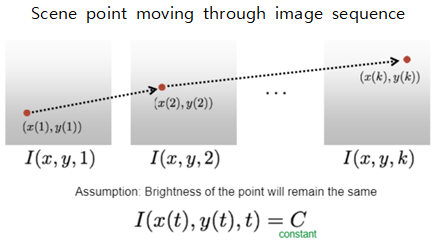

- Implication : allows for pixel to pixel comparison not image features

2. Small Motion
  
  : pixels only move a little bit

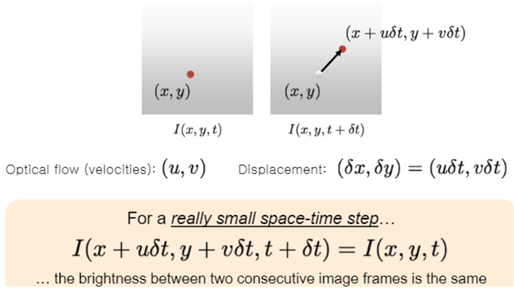

- Implication : Linearization of the brightness constancy constraint

### 🧷 From the Assumptions

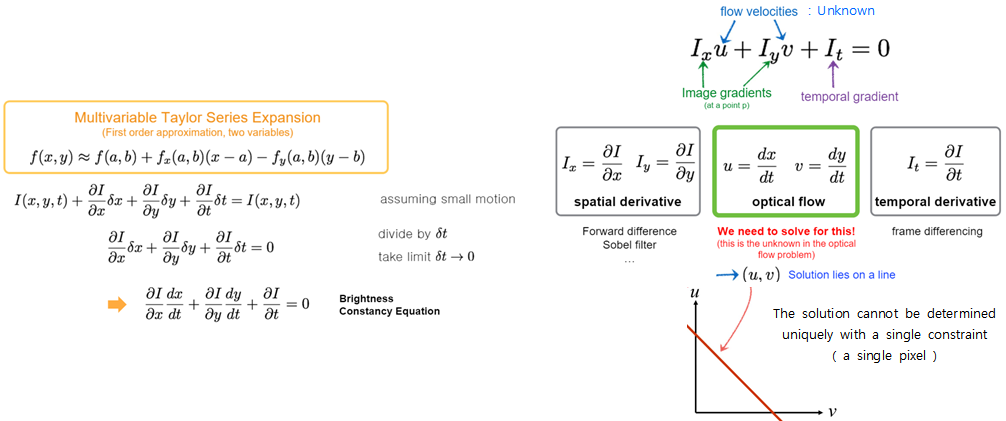

### 🧷 Where we get more Equations( Constraints )?
### 1️⃣ Lucas-Kanade Optical Flow
### Constant Flow 
: Assume that the surrounding path has constant flow

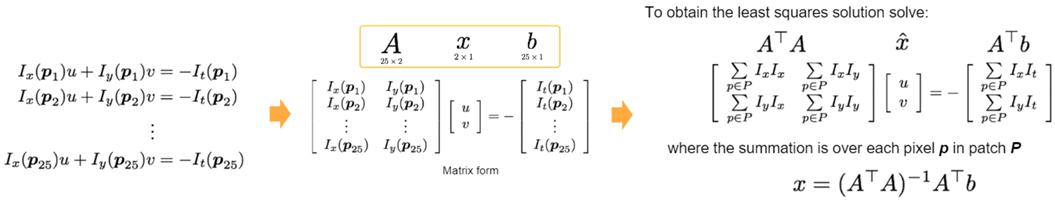

- Flow is locally smooth
- Neighboring pixels have same displacement
- Method of differences
- local method( sparse )

### Aperture Problem = Barer's pole illusion 
: 작은 patch로 보면 motion 방향이 달라짐

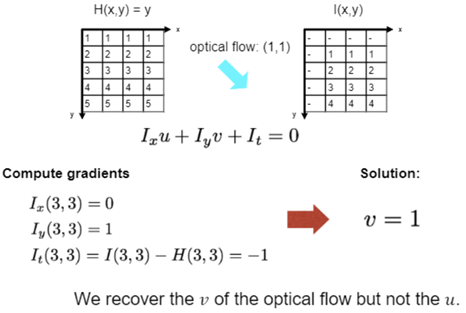

➡️ Lucas-Kanade with pyramid : Coarse-to-fine optical flow estimation

<br>

### 2️⃣ Horn-Schunck Optical Flow

### Smooth Flow
- Global method( Dense )
- Enforce **Brightness Constancy** & **Smooth Flow Field

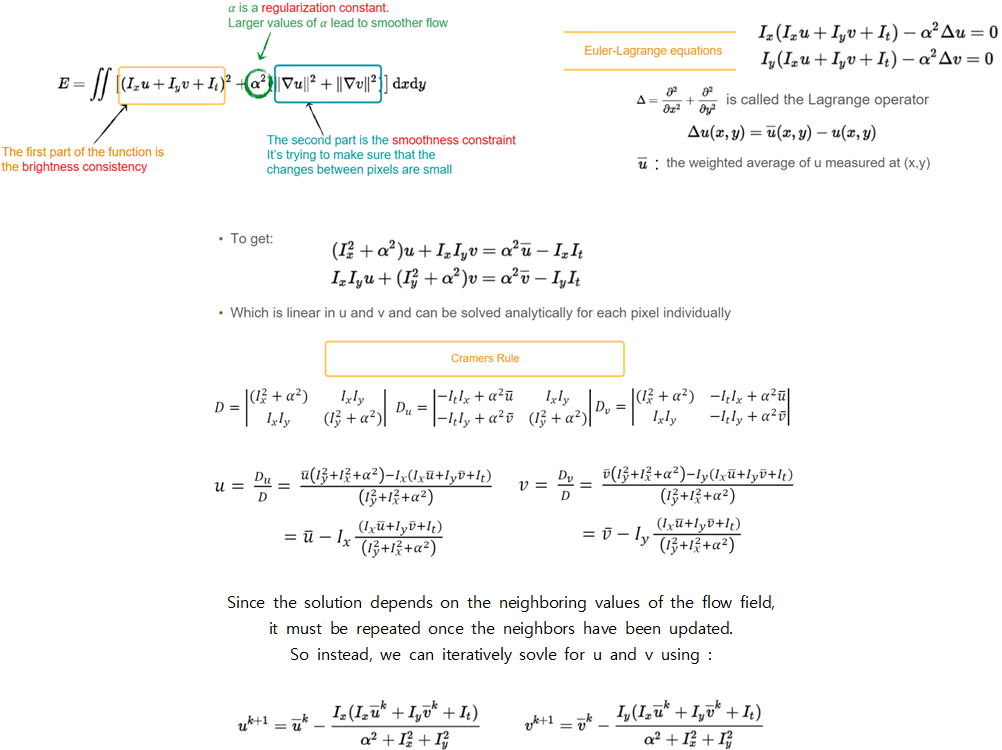

1. Intialize u and v as 0 matrices
2. Compute Ix, Iy and It images using the masks
3. Update u, v
4. Repeat the above steps until some error measure is satisfied

<br>

## 📌 Visual Tracking

### Challenges
- Variations due to geometric changes( pose, articulation, scale )
- Variations due to photometric factors( illumination, appearance )
- Occulsions
- Non-linear motion
- Very limited resolution, blurry( standard recognition might fail )
- Similar objects in the scene

### Algorithms common issues
- Track initiation & termination
- Occlusion handling
- Merging/Switching
- Drifting due to wrong update of the target model

<br>

### 1️⃣ KLT( Kanade-Lucas-Tomasi ) Tracker
- Feature Tracking : Image sequence ➜ Feature Point Detection ➜ Feature Point Tracking


1. Find corners satisfying min(λ1, λ2) > λ
2. For each corner compute displacement to next frame using the Lucas-Kanade method
3. Store displacement of each corner, update corner position
4. (optional) Add more corner points every M frames using 1
5. Repeat 2,3 and 4
6.Returns long trajectories for each corner point

### Corner = Good Feature Point

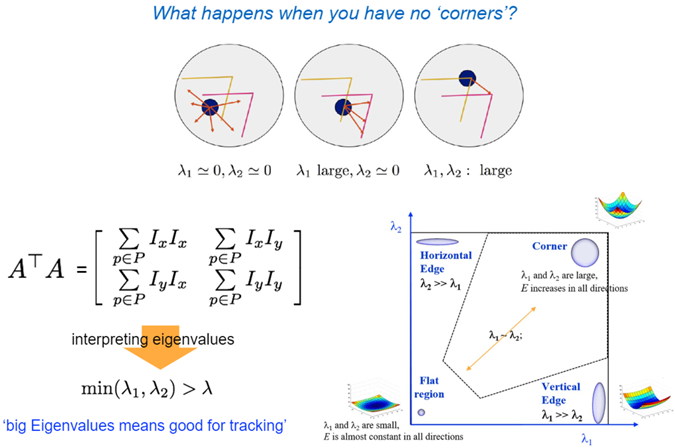

<br>

### 2️⃣ Mean Shift Tracking 
- Appearance-Based Tracking


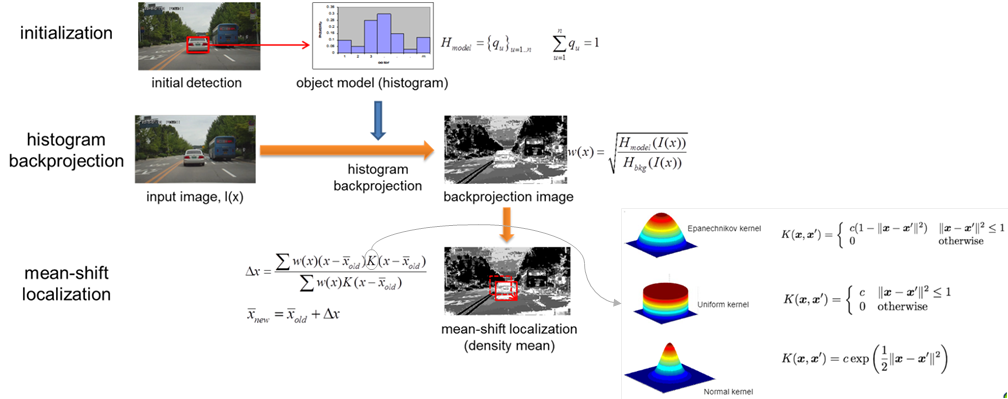

- non-parametric feature space
- Mode seeking Algorithm
- create a color **likelihood** image, with pixels wegithed by similarity to the desired color( best for unicolored object )
  - **likelihood** : pixel이 그 색으로 표현될 확률 표현

<br>

### 3️⃣ CAM Shift Tracking ( Continuously Adaptive Meanshift )
- Adapt window size with size and rotation of the target
- Update the size of windowas as 

      s = 2 x sqrt(Moment/256)

- Similarity between the target and candidate
  - using **Bhattacharyya distance**

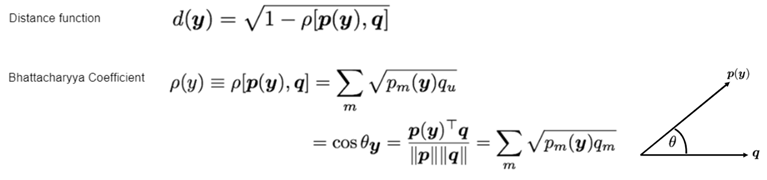



<br>

# Chap 13. ConvNets for Image

## Fully-connected layer
- Layer which are full connections to all activations in the previous layer
- Flatten and connect all the output from the previous layer
- Cheap way to learn **non-linear combinations** of the features

## Convolution 

    w_out = [ w_in + 2p - k / s ]+ 1

- Spatially invariant 
- Learn convolutional weights directly from the data

## Pooling
- Reduce the sptial size and computation power
- Reducing the number of parameters
- Generating more robust features maps : Shift Invariant
- Makes the representations smaller and more manageable
- Operates over each activation map independently

## Alexnet
- ReLU
  - Does not saturate
  - Computationally efiicient
  - Convergence mush faster than sigmoid or tanh
  - Not zero-centered output
  - Only keeps x>0
- Dropout
- Data augmentation

<br>

# Chap 14. Robot Vision

|                                        | INPUT                  | OUTPUT                 |
|----------------------------------------|------------------------|------------------------|
| Signal Processing                      | Electrical signals     | Electrical signals     |
| Image Processing                       | Images                 | Images                 |
| Pattern Recognition / Machine Learning | Information / Features | Information            |
| Computer Vision                        | Images                 | Information / Features |
| Machine Vision                         | Images                 | Information            |
| Robot Vision                           | Images                 | Physical Action        |

## 📌 Machine Vision
: Refers to the industrial use of vision for automatic inspection, process control and robot guidance
- Applications : Guidance, Identification, Gasuging, Inspection 

<br>

## 📌 Robot Vision : Visual Servoing
: Move from current to desired robot configuration
- control feedback generated by computer vision techniques

## Camera Configuration
### 1️⃣ Eye-on-Hand : End-Effector mounted

### 2️⃣ Eye-to-Hand
- Lots of coordinate frames to calibrate
- Camera : Centerof projection, Different models
- Robot : Base frame, End-effector frame, object

## Visual Servo Control Law
### 1️⃣ Image-based visual servoing ( IBVS )
- Desired image features seen from camera
- Control law entirely based on image features
- Allignment in image coordinates
- Robust to calibration errors if target image known
- Depth of target must be estimated
- Large pose error can cause unpredictable trajectory
- Image feature parameter space
- No knowledge about observed scene

### 2️⃣ Position-based visual servoing ( PBVS )
- Robust and real-time pose estimation + robot's world-space controller
- Alginment in target coordinate system
- Allow in target coordinate system
- Allows 3D trajectory planning
- Sensitive to calibration errors
- End-effector may leave field of view
- Reconstructino of geometrical model 
- Pose of camera w.r.t. external reference frame( task space )

### 3️⃣ Hybrid VS
- Combination of IBVS and PBVS
- 2D image and 3D pose information

### 4️⃣ Paritioned VS
- Image feature parameter space
- Decoupling : one DOF per feature

### Challenges 
: Handling Uncertainties due to Bariations in Visual Environment
- Relative Distance
- Illumination
- Occlusion
- Relative Orientation
- Color Distortion
- Merging

### Application
- Visual Learning of Assembly Tasks
  - Object DB Generation based on 3D camera
  - Segmentation and Workspace Modeling
  - Object Recogntion and Pose Estimation
- High-speed Visual Servo and Tracking

<br>

## 📌 Robot Vision : Visual SLAM

### SLAM ( Simultaneous Localization And Mapping )
: Map building and localization at the same time
- To fuse image and odometry data in a way that enables SLAM
  - OUTPUT : robot pose & abstract vSLAM map

### Required Techniques for Visual SLAM
1. Imaging System
- Single, Stereo, Multiple, Catadioptric
2. Extract distinctive Features from Environment
- Point, Line/Edge, Featureless
3. Stable in dynamic changes(States)
- Robust to noise : Kalman Filter, Extended Kalman Filter, Particle Filter, RANSAC
4. Matching features or quantities derived from images
- Straightforward matching : SIFT, SURF

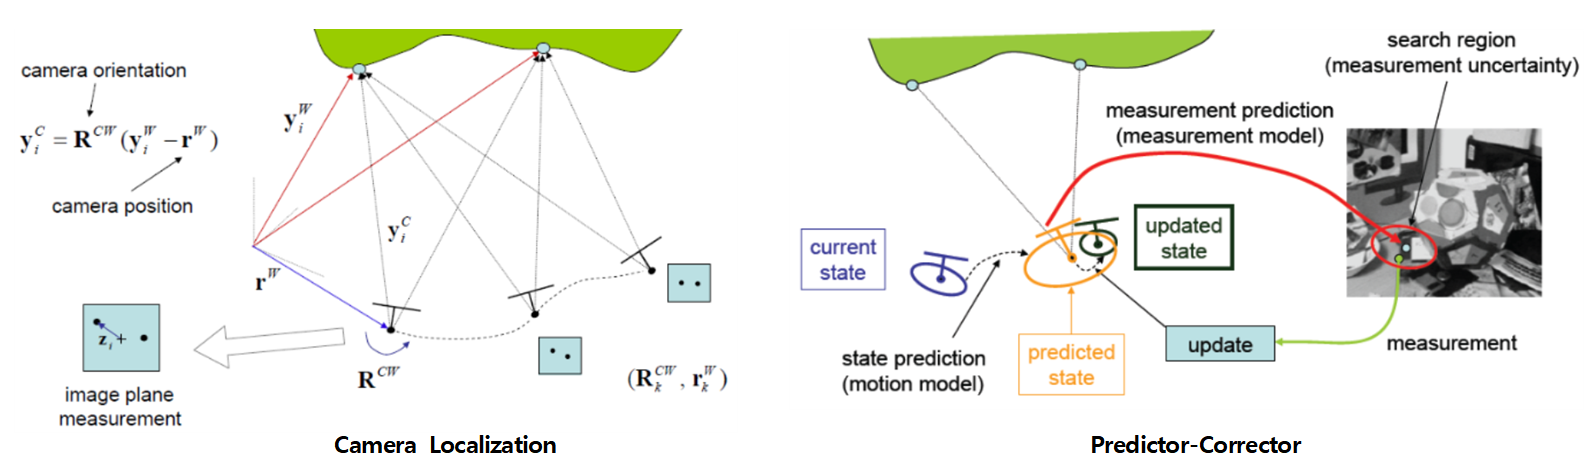
